In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read excel file

Base_Interest_Rate = pd.read_excel("../00_Data/Original_data/Base_Interest_Rate.xlsx")
Base_Interest_Rate.head()

,Date,Base Interest Rate
0,201101월,2.75
1,201102월,2.75
2,201103월,3.00
3,201104월,3.00
4,201105월,3.00


In [5]:
Base_Interest_Rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                160 non-null    object 
 1   Base Interest Rate  160 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [6]:
Base_Interest_Rate_drop = Base_Interest_Rate.dropna()
Base_Interest_Rate_drop

,Date,Base Interest Rate
0,201101월,2.75
1,201102월,2.75
2,201103월,3.00
3,201104월,3.00
4,201105월,3.00
...,...,...
155,202312월,3.50
156,202401월,3.50
157,202402월,3.50
158,202403월,3.50


In [7]:
Base_Interest_Rate_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                160 non-null    object 
 1   Base Interest Rate  160 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [8]:
Base_Interest_Rate_drop.describe()

,Base Interest Rate
count,160.000000
mean,1.993750
std,0.942927
min,0.500000
25%,1.250000
50%,1.750000
75%,2.750000
max,3.500000


In [9]:
Base_Interest_Rate_drop.dtypes

Date                   object
Base Interest Rate    float64
dtype: object

In [10]:
Base_Interest_Rate_drop.head()
# Since the base interest rate changes monthly, convert it into daily data here.

,Date,Base Interest Rate
0,201101월,2.75
1,201102월,2.75
2,201103월,3.00
3,201104월,3.00
4,201105월,3.00


In [16]:
from datetime import datetime, timedelta

# Convert the 'Date' column to string type
Base_Interest_Rate_drop['Date'] = Base_Interest_Rate_drop['Date'].astype(str)

monthly_data = Base_Interest_Rate_drop.values

monthly_data = monthly_data.tolist()

daily_data = []

# Process each month's data
for year_month, value in monthly_data:
    # Extract year and month
    year, month = int(year_month[:4]), int(year_month[4:6])
    # Create the first date of the month
    start_date = datetime(year, month, 1)
    # Create the last date of the month
    if month == 12:
        end_date = datetime(year + 1, 1, 1) - timedelta(days=1)
    else:
        end_date = datetime(year, month + 1, 1) - timedelta(days=1)
    
    # Store the value for each date
    while start_date <= end_date:
        daily_data.append([start_date.strftime("%Y-%m-%d"), value])
        start_date += timedelta(days=1)

print("Daily data:", np.array(daily_data))

# Create a new DataFrame with daily data
new_copy_Base_Interest_Rate_drop = pd.DataFrame(daily_data, columns=Base_Interest_Rate_drop.columns)

# Save the DataFrame to an Excel file
new_copy_Base_Interest_Rate_drop.to_excel("../00_Data/Transformed_data/new_copy_Base_Interest_Rate_drop.xlsx")


일별 데이터: [['2011-01-01' '2.75']
 ['2011-01-02' '2.75']
 ['2011-01-03' '2.75']
 ...
 ['2024-04-28' '3.5']
 ['2024-04-29' '3.5']
 ['2024-04-30' '3.5']]


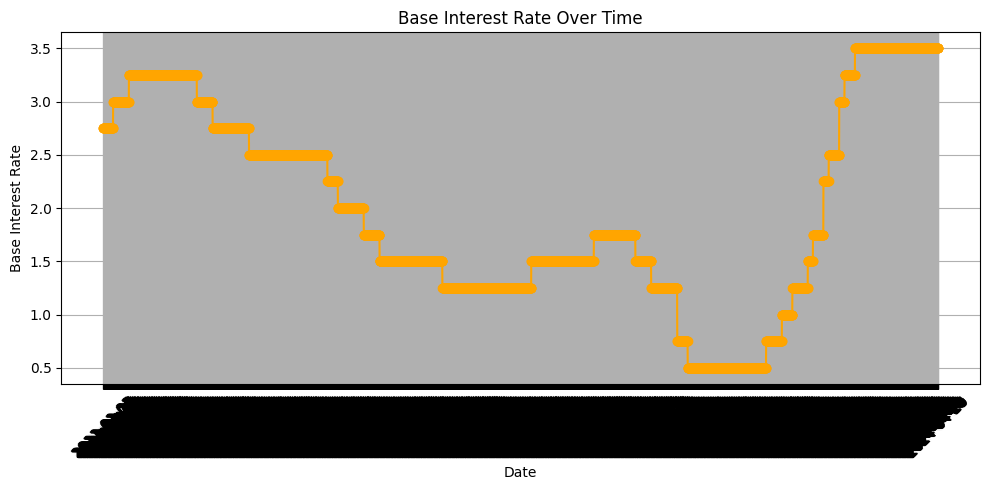

In [17]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(new_copy_Base_Interest_Rate_drop['Date'], new_copy_Base_Interest_Rate_drop['Base Interest Rate'], marker='o', color='orange')
plt.title('Base Interest Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Base Interest Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()